In [1]:
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse

# import linear regression from sklearn
from sklearn.linear_model import LinearRegression

# import to assess performance based on mse and R^2
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import KFold, RepeatedKFold, cross_validate

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.graph_objs as go
import plotly.offline as py
import plotly.express as px
import seaborn as sn

py.init_notebook_mode(connected=True)

In [3]:
X_train = pd.read_csv("2_Output/2_test_train_encoded/X_train.csv")
X_train = X_train.drop(['Unnamed: 0'], axis=1)
X_test = pd.read_csv("2_Output/2_test_train_encoded/X_test.csv")
X_test = X_test.drop(['Unnamed: 0'], axis=1)
y_train = pd.read_csv("2_Output/2_test_train_encoded/y_train.csv")
y_train = y_train.drop(['Unnamed: 0'], axis=1)
y_test = pd.read_csv("2_Output/2_test_train_encoded/y_test.csv")
y_test = y_test.drop(['Unnamed: 0'], axis=1)

In [4]:
X_train.head()

,Population,KSI,TotalYouthServices,CommunityHousing,PlacesOfWorship,SocialHousing,TPSFacilities_2km_TF,TOD_Afternoon,TOD_Morning,TOD_Night
0,12541,18,0,49,4,950,1,0,1,0
1,33964,58,2,3,12,879,1,0,1,0
2,7727,10,14,39,6,751,1,1,0,0
3,22162,23,6,9,7,788,1,0,0,1
4,35052,88,20,4,23,571,0,0,0,1


In [5]:
X_train_3 = X_train.iloc[:,[1,2,3,4,5,7,8,9]]
X_train_3

,KSI,TotalYouthServices,CommunityHousing,PlacesOfWorship,SocialHousing,TOD_Afternoon,TOD_Morning,TOD_Night
0,18,0,49,4,950,0,1,0
1,58,2,3,12,879,0,1,0
2,10,14,39,6,751,1,0,0
3,23,6,9,7,788,0,0,1
4,88,20,4,23,571,0,0,1
...,...,...,...,...,...,...,...,...
289,15,14,10,14,356,1,0,0
290,14,4,19,12,38,0,1,0
291,18,10,1,7,316,0,0,1
292,114,4,0,12,332,0,0,1


In [6]:
X_train_3.dtypes

KSI                   int64
TotalYouthServices    int64
CommunityHousing      int64
PlacesOfWorship       int64
SocialHousing         int64
TOD_Afternoon         int64
TOD_Morning           int64
TOD_Night             int64
dtype: object

In [7]:
X_test_3 = X_test.iloc[:,[1,2,3,4,5,7,8,9]]
X_test_3.head()

,KSI,TotalYouthServices,CommunityHousing,PlacesOfWorship,SocialHousing,TOD_Afternoon,TOD_Morning,TOD_Night
0,185,41,26,3,2644,0,0,1
1,30,4,2,12,1036,0,1,0
2,24,2,26,10,151,0,0,1
3,35,9,48,16,1016,1,0,0
4,91,13,8,16,422,1,0,0


In [8]:
# import linear regression from sklearn
from sklearn.linear_model import LinearRegression

# import to assess performance based on mse and R^2
from sklearn.metrics import mean_squared_error, r2_score
from numpy import percentile
from scipy import stats
import statsmodels.api as sm

In [15]:
def linReg (X_train,y_train,X_test, y_test):

# intantiate and fit
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    
    #print("Intercept:",lr.intercept_)
    coeff = lr.coef_
    
    # making predictions
    y_pred_test = lr.predict(X_test)
    
    # metrics of performance
    mse_ = mean_squared_error(y_test, y_pred_test)
    r2_ = r2_score(y_test, y_pred_test)
    # Obtain Mean Absolute Error
    mae = mean_absolute_error(y_test, y_pred_test)
    
    # print mse, r2
    print("MSE = ", mse_)
    #print("R2 = ", r2_)
    print('Mean Absolute Error', mae)
    
    coef_table = pd.DataFrame(list(X_train.columns)).copy()
    coef_table.insert(len(coef_table.columns),"Coefs",coeff.transpose())
  
    # Print Coefficient table
    params = np.append(lr.intercept_,lr.coef_)
    
    newX = pd.DataFrame({"Constant":np.ones(len(X_train))}).join(pd.DataFrame(X_train))

    var_b = mse_*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
    sd_b = np.sqrt(var_b)
    ts_b = params/ sd_b

    p_values =[2*(1-stats.t.cdf(np.abs(i),(newX.shape[0]- newX.shape[1]))) for i in ts_b]

    sd_b = np.round(sd_b,3)
    ts_b = np.round(ts_b,3)
    p_values = np.round(p_values,3)
    params = np.round(params,4)

    features = ["Intercept","KSI", "TotalYouthServices", "CommunityHousing", "PlacesOfWorship", "SocialHousing",\
               'TOD_Afternoon','TOD_Morning','TOD_Night']
    
    myDF3 = pd.DataFrame()
    myDF3["bias"],myDF3["Coefficients"],myDF3["Standard Errors"],myDF3["t values"],myDF3["Probabilities"] = [features,params,sd_b,ts_b,p_values]
    print(myDF3)  
    
    print("============================================")

  


    
      
    #Errors
    diff = (y_test - y_pred_test)

    
    # Plot histogram and adjust style
    plt.hist(diff, edgecolor='black', linewidth=1.2)
    plt.title("Errors Histogram")
    
    # identify outliers with interquartile range
    data = diff
    # calculate interquartile range
    q25, q75 = percentile(data, 25), percentile(data, 75)
    iqr = q75 - q25
    print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
    print("============================================")
    
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    # identify outliers
    outliers = [x for x in np.array(data) if x < lower or x > upper]
    print('Identified outliers: %d' % len(outliers))
    # remove outliers
    outliers_removed = [x for x in np.array(data) if x >= lower and x <= upper]
    print('Non-outlier observations: %d' % len(outliers_removed))
    print("============================================")
    
    
    # give me the coefficients and intercept
    coefficients_ = lr.coef_
    intercept_ = lr.intercept_
    
    #print("Coefficients = ", coefficients_)
    #print("Bias = ", intercept_)
 

    print('Predictions', y_pred_test)
    print("Errors",diff)
    
    print("============================================")
    # KFold cross_validate
    # https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html
    # Kfold CV
    kf = KFold(n_splits=10, shuffle=True, random_state=24)
    cval_score = cross_validate(lr,X_train, y_train, cv=kf,\
                                scoring = ('r2','neg_mean_squared_error'),\
                                return_train_score=True)
    print('kfold CV neg MSE', cval_score['test_neg_mean_squared_error'])
    print('kFold R^2',cval_score['train_r2'])
    print('10-KFold folds:',kf)
    
        #################
    plt.figure(figsize=(10,5))
    plt.bar(range(len(cval_score['test_neg_mean_squared_error'])), cval_score['test_neg_mean_squared_error'])
    plt.title('10-Fold Cross Validation Score')
    plt.ylabel('neg_MSE')
    plt.xlabel('Iteration')

    plt.plot(range(len(cval_score['test_neg_mean_squared_error']) + 1), \
             [cval_score['test_neg_mean_squared_error'].mean()] * (len(cval_score['test_neg_mean_squared_error']) + 1))
    plt.tight_layout()
    
    print("---------------------------------------------------------")
    
    kf5 = KFold(n_splits=5, shuffle=True, random_state=24)
    cval_score5 = cross_validate(lr,X_train, y_train, cv=kf5,\
                                scoring = ('r2','neg_mean_squared_error'),\
                                return_train_score=True)
    print('kfold CV neg MSE', cval_score5['test_neg_mean_squared_error'])
    print('kFold R^2',cval_score5['train_r2'])
    print('5-Fold folds:',kf5)
    
        #################
    plt.figure(figsize=(10,5))
    plt.bar(range(len(cval_score5['test_neg_mean_squared_error'])), cval_score5['test_neg_mean_squared_error'])
    plt.title('5-Fold Cross Validation Score')
    plt.ylabel('neg_MSE')
    plt.xlabel('Iteration')

    plt.plot(range(len(cval_score5['test_neg_mean_squared_error']) + 1), \
             [cval_score5['test_neg_mean_squared_error'].mean()] * (len(cval_score5['test_neg_mean_squared_error']) + 1))
    plt.tight_layout()
    
    print("---------------------------------------------------------")
    
    plt.figure(figsize=(10, 5))
    plt.scatter(y_test, y_pred_test, s=20)
    plt.title('Predicted vs. Actual')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    
    #plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)])
    #plt.tight_layout()
   

    

    
    return


MSE =  53297.851155582815
Mean Absolute Error 99.79160906697139
                 bias  Coefficients  Standard Errors  t values  Probabilities
0           Intercept       26.9361     1.086603e+09     0.000          1.000
1                 KSI        1.8829     5.320000e-01     3.539          0.000
2  TotalYouthServices       10.7920     1.576000e+00     6.846          0.000
3    CommunityHousing        0.0730     5.530000e-01     0.132          0.895
4     PlacesOfWorship       -0.2125     2.329000e+00    -0.091          0.927
5       SocialHousing        0.0780     3.000000e-02     2.643          0.009
6       TOD_Afternoon       19.6922     1.086603e+09     0.000          1.000
7         TOD_Morning      -73.1065     1.086603e+09    -0.000          1.000
8           TOD_Night       53.4144     1.086603e+09     0.000          1.000
Percentiles: 25th=-58.086, 75th=73.040, IQR=131.126
Identified outliers: 4
Non-outlier observations: 122
Predictions [[1078.74296109]
 [ 131.92325483]
 [ 15

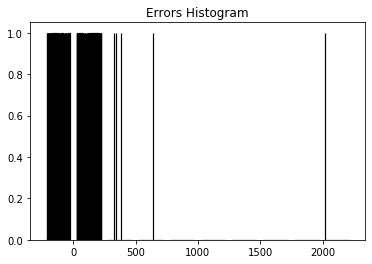

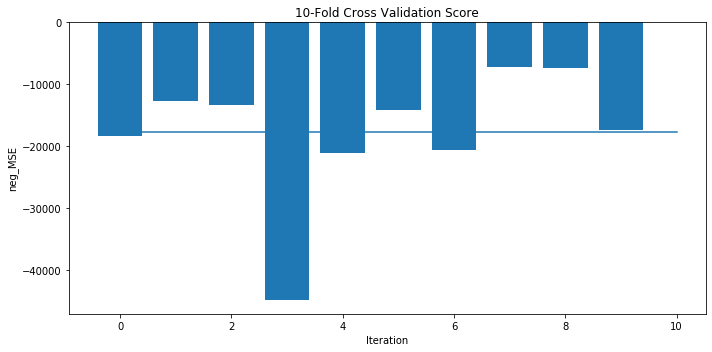

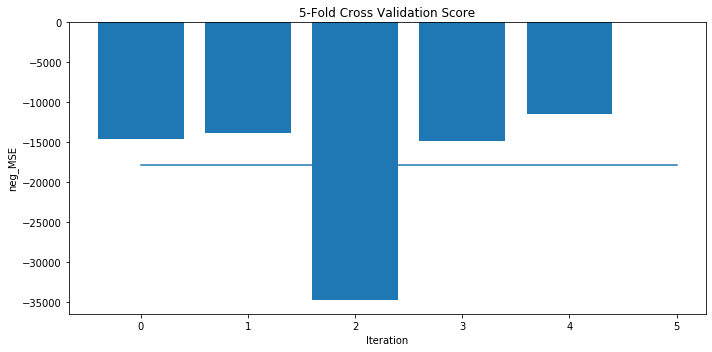

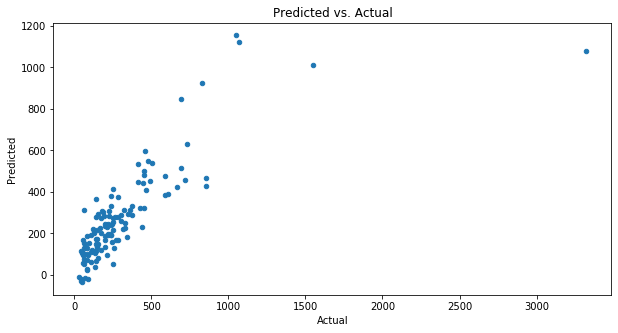

In [16]:
Assault_sklearn = linReg(X_train_3, y_train.iloc[:,[0]], X_test_3, y_test.iloc[:,[0]] )

MSE =  6305.159376679307
Mean Absolute Error 33.720101020977374
                 bias  Coefficients  Standard Errors  t values  Probabilities
0           Intercept        1.3380     3.737353e+08     0.000          1.000
1                 KSI        0.7237     1.830000e-01     3.955          0.000
2  TotalYouthServices       -0.3807     5.420000e-01    -0.702          0.483
3    CommunityHousing        0.0438     1.900000e-01     0.231          0.818
4     PlacesOfWorship        2.6844     8.010000e-01     3.351          0.001
5       SocialHousing       -0.0024     1.000000e-02    -0.236          0.813
6       TOD_Afternoon       -4.6909     3.737353e+08    -0.000          1.000
7         TOD_Morning      -21.2819     3.737353e+08    -0.000          1.000
8           TOD_Night       25.9729     3.737353e+08     0.000          1.000
Percentiles: 25th=-24.860, 75th=16.890, IQR=41.750
Identified outliers: 6
Non-outlier observations: 120
Predictions [[ 1.48427677e+02]
 [ 3.00570019e+01]
 [

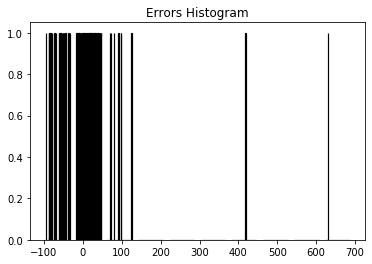

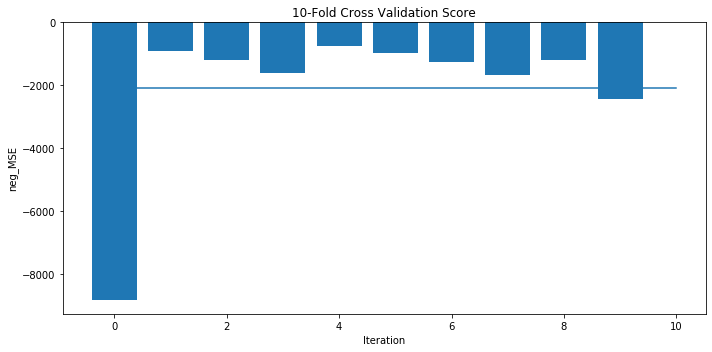

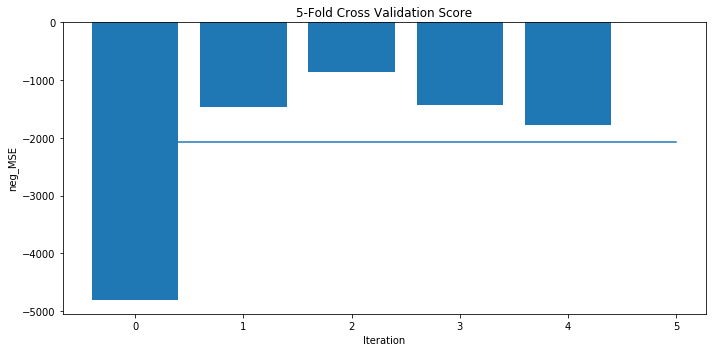

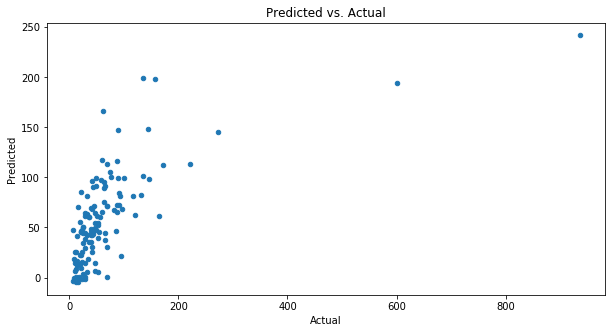

In [17]:
AutoTHeft_sklearn = linReg(X_train_3, y_train.iloc[:,[1]], X_test_3, y_test.iloc[:,[1]] )

MSE =  2747.036962750416
Mean Absolute Error 33.51387494214477
                 bias  Coefficients  Standard Errors  t values  Probabilities
0           Intercept       23.7681     2.466882e+08     0.000          1.000
1                 KSI        0.6648     1.210000e-01     5.504          0.000
2  TotalYouthServices        2.6211     3.580000e-01     7.324          0.000
3    CommunityHousing       -0.3213     1.250000e-01    -2.561          0.011
4     PlacesOfWorship        2.1098     5.290000e-01     3.990          0.000
5       SocialHousing        0.0188     7.000000e-03     2.798          0.005
6       TOD_Afternoon      -12.9570     2.466882e+08    -0.000          1.000
7         TOD_Morning       -2.9454     2.466882e+08    -0.000          1.000
8           TOD_Night       15.9024     2.466882e+08     0.000          1.000
Percentiles: 25th=-32.521, 75th=15.032, IQR=47.554
Identified outliers: 6
Non-outlier observations: 120
Predictions [[317.69198383]
 [ 95.35674678]
 [ 76.445

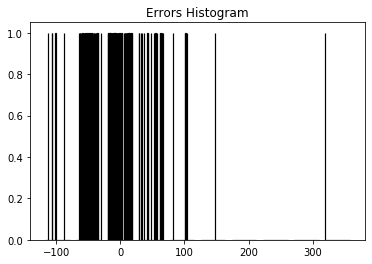

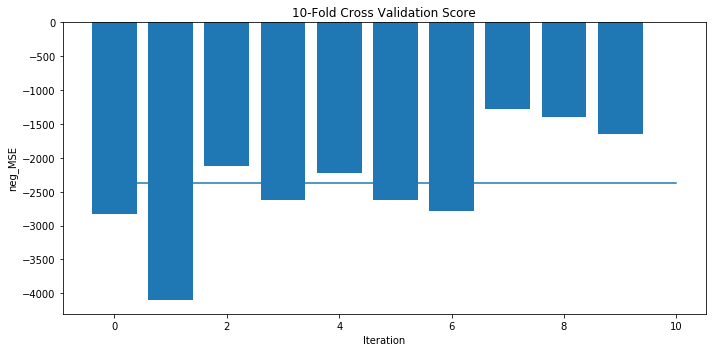

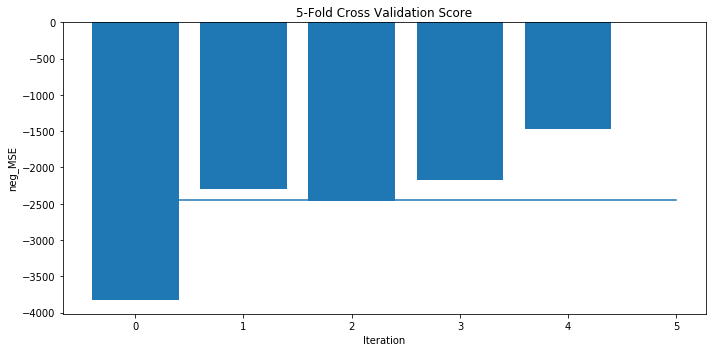

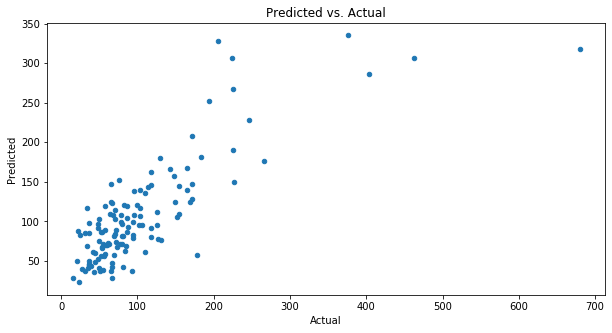

In [18]:
BreakandEnter_sklearn = linReg(X_train_3, y_train.iloc[:,[2]], X_test_3, y_test.iloc[:,[2]] )

MSE =  1813.268330063344
Mean Absolute Error 26.00396261553427
                 bias  Coefficients  Standard Errors  t values  Probabilities
0           Intercept        4.6864     2.004228e+08     0.000          1.000
1                 KSI        0.1834     9.800000e-02     1.869          0.063
2  TotalYouthServices        1.7453     2.910000e-01     6.003          0.000
3    CommunityHousing        0.1270     1.020000e-01     1.246          0.214
4     PlacesOfWorship        0.8392     4.300000e-01     1.953          0.052
5       SocialHousing        0.0162     5.000000e-03     2.975          0.003
6       TOD_Afternoon        5.6210     2.004228e+08     0.000          1.000
7         TOD_Morning      -28.0660     2.004228e+08    -0.000          1.000
8           TOD_Night       22.4450     2.004228e+08     0.000          1.000
Percentiles: 25th=-14.317, 75th=19.165, IQR=33.482
Identified outliers: 7
Non-outlier observations: 119
Predictions [[ 1.81262406e+02]
 [ 1.62096679e+01]
 [ 

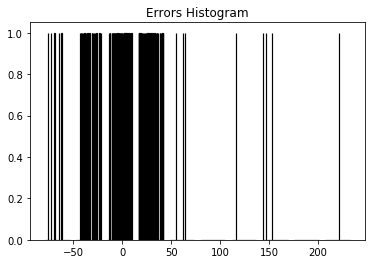

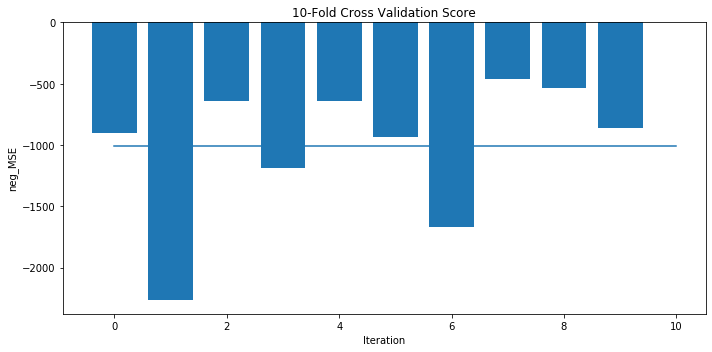

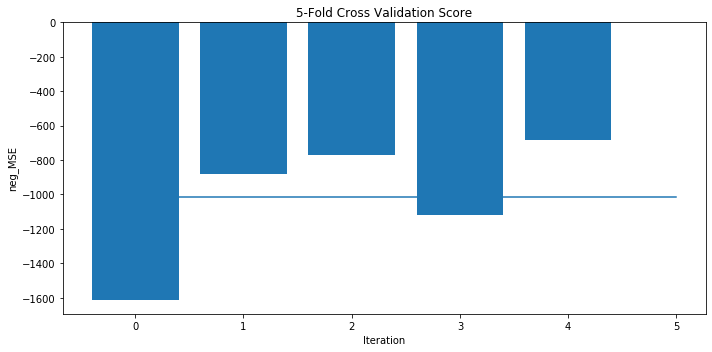

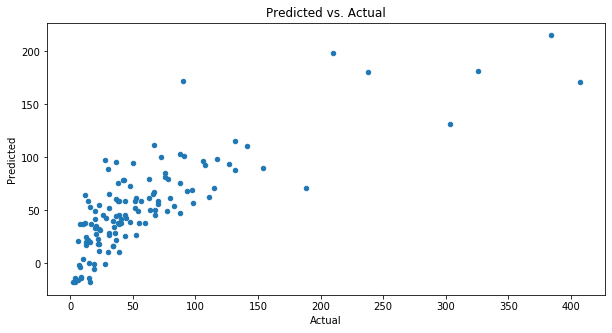

In [19]:
Robbery_sklearn = linReg(X_train_3, y_train.iloc[:,[3]], X_test_3, y_test.iloc[:,[3]] )

MSE =  202.27448786240132
Mean Absolute Error 8.464433262740425
                 bias  Coefficients  Standard Errors  t values  Probabilities
0           Intercept       -0.8208     6.694015e+07    -0.000          1.000
1                 KSI        0.2379     3.300000e-02     7.259          0.000
2  TotalYouthServices        0.8421     9.700000e-02     8.672          0.000
3    CommunityHousing       -0.0590     3.400000e-02    -1.733          0.084
4     PlacesOfWorship        0.0689     1.430000e-01     0.480          0.632
5       SocialHousing       -0.0020     2.000000e-03    -1.121          0.263
6       TOD_Afternoon        2.4742     6.694015e+07     0.000          1.000
7         TOD_Morning       -2.3485     6.694015e+07    -0.000          1.000
8           TOD_Night       -0.1257     6.694015e+07    -0.000          1.000
Percentiles: 25th=-4.880, 75th=5.276, IQR=10.156
Identified outliers: 9
Non-outlier observations: 117
Predictions [[70.87543611]
 [ 5.93250048]
 [ 5.2950604

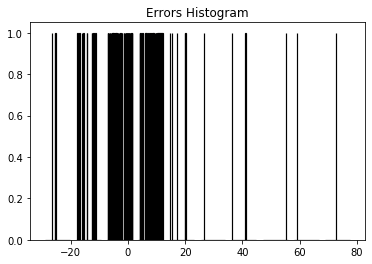

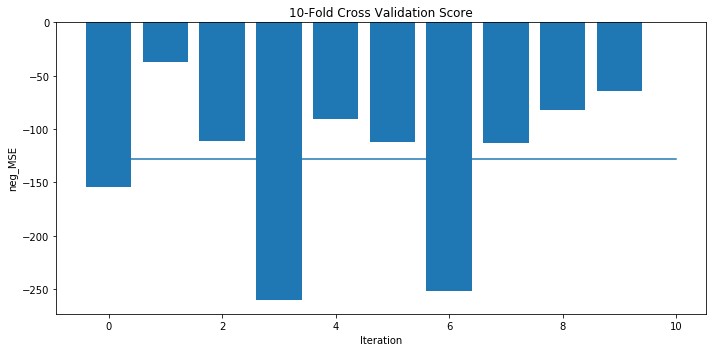

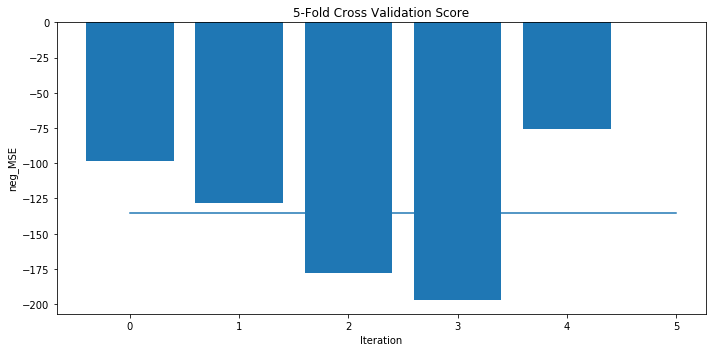

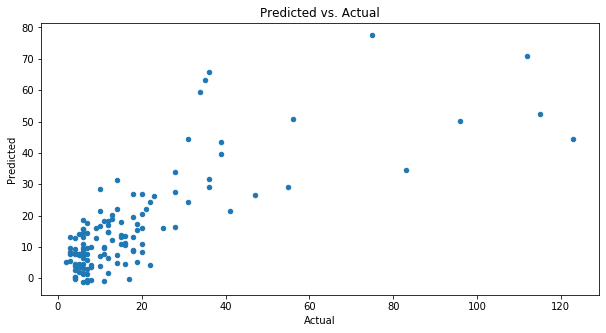

In [20]:
TheftOver_sklearn = linReg(X_train_3, y_train.iloc[:,[4]], X_test_3, y_test.iloc[:,[4]] )